In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(519, 506)
(28, 1, 2)


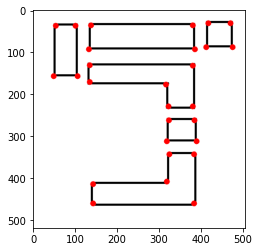

(<matplotlib.image.AxesImage at 0x7f30bfa2c040>, None)

In [47]:
# read the image
img = cv2.imread('img.png')

# convert image to gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect corners with the goodFeaturesToTrack function
corners = cv2.goodFeaturesToTrack(gray, 28, 0.04, 10)
corners = np.int0(corners)
print(gray.shape)
print(corners.shape)


# we iterate through each corner, 
# making a circle at each point that we think is a corner
for i in corners:
  x, y = i.ravel()
  cv2.circle(img, (x, y), 7, 255, -1)
  #print(x, y)

plt.imshow(img), plt.show()


Generate 3D mesh. Separate these 6 parts/faces from the image

In [48]:
!pip3 install numpy-stl
from stl import mesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
vertices_set_01=np.array([\
    [313,94,100],
    [103,94,100],
    [313,47,100],
    [103,47,100] 
])
# Define the 2 triangles composing the first face
faces_1 = np.array([\
    [0,2,1],
    [1,2,3]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces_1.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_1):
    for j in range(3):
        cube.vectors[i][j] = vertices_set_01[f[j],:]

# Write the mesh to file "faces_01.stl"
cube.save('faces_01.stl')


In [ ]:
vertices_set_02=np.array([\
    [326,670,100],
    [265,670,100],
    [326,495,100],
    [265,495,100] 
])
# Define the 2 triangles composing the first face
faces_2 = np.array([\
    [0,2,1],
    [1,2,3]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces_2.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_2):
    for j in range(3):
        cube.vectors[i][j] = vertices_set_02[f[j],:]

# Write the mesh to file "faces_2.stl"
cube.save('faces_2.stl')

In [ ]:
vertices_set_03=np.array([\
    [334,446,100],
    [264,446,100],
    [334,386,100],
    [264,386,100] 
      
])
# Define the 2 triangles composing the first face
faces_3 = np.array([\
    [0,2,1],
    [1,2,3]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces_3.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_3):
    for j in range(3):
        cube.vectors[i][j] = vertices_set_03[f[j],:]

# Write the mesh to file "faces_3.stl"
cube.save('faces_3.stl')

In [ ]:
vertices_set_04=np.array([\
    [334,446,100],
    [264,446,100],
    [334,386,100],
    [264,386,100] 
])
faces_4 = np.array([\
    [0,2,1],
    [1,2,3]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces_4.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_4):
    for j in range(3):
        cube.vectors[i][j] = vertices_set_04[f[j],:]

# Write the mesh to file "faces_4.stl"
cube.save('faces_4.stl')

In [ ]:
vertices_set_05=np.array([\
    [100,300,100],
    [100,200,100],
    [400,100,100],
    [300,100,100],
    [300,200,100],
    [400,300,100]]) 
 
faces_5 = np.array([\
    [0,1,4],
    [4,5,0],
    [5,4,2],
    [2,4,3]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces_5.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_5):
    for j in range(3):
        cube.vectors[i][j] = vertices_set_05[f[j],:]

# Write the mesh to file "faces_5.stl"
cube.save('faces_5.stl')

In [ ]:
vertices_set_06=np.array([\
    [125,785,100],
    [129,846,100],
    [258,791,100],
    [335,851,100],
    [332,753,100],
    [261,751,100]]) 
 
faces_6 = np.array([\
    [0,1,2],
    [2,1,3],
    [3,4,2],
    [2,4,5]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces_6.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_6):
    for j in range(3):
        cube.vectors[i][j] = vertices_set_06[f[j],:]
        #print(i, j)

# Write the mesh to file "faces_6.stl"
cube.save('faces_6.stl')


[[2 4 3]
 [4 2 5]
 [2 1 0]
 [1 2 3]]
[[125. 785. 100.]
 [129. 846. 100.]
 [258. 791. 100.]
 [335. 851. 100.]
 [332. 753. 100.]
 [261. 751. 100.]]


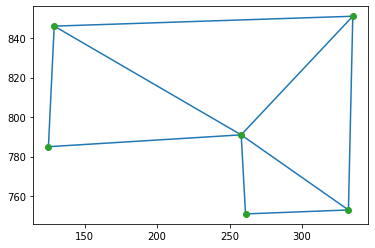

In [4]:
from scipy.spatial import Delaunay

points = np.array([
    [125,785],
    [129,846],
    [258,791],
    [335,851],
    [332,753],
    [261,751]])

tri = Delaunay(points)
D_tri_to_faces = np.array(tri.simplices)

# Slicing the array to remove unwanted edges generated during Delaunay trianglations
D_tri_to_faces=D_tri_to_faces[1:,]      
print(D_tri_to_faces)

z = np.zeros((6,1))
z[:,:]=100    #inserting z value on each index position

new_points = np.append(points, z, axis=1)
print(new_points)

# Create the mesh
cube = mesh.Mesh(np.zeros(D_tri_to_faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(D_tri_to_faces):
    for j in range(3):
        cube.vectors[i][j] = new_points[f[j],:]
        #print(i, j)

# Write the mesh to file "cube.stl"
cube.save('faces_6.stl')

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], D_tri_to_faces)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()


Rotate surface-01 and then translate to the position of surface-06.

In [32]:
import math

def rotation_vertex(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

axis = [100, 4, 4]

# 90° × π/180 = 1.571rad
# 270° × π/180 = 4.712rad
# 180° × π/180 = 3.142rad
theta = 4.71239

rp = []
v = np.array([
    [313,94,100],
    [103,94,100],
    [313,47,100],
    [103,47,100]])

for i in range(len(v)):
 #print(v[i])
  one_point_rotated = np.dot(rotation_vertex(axis, theta), v[i])
  #print("rotated points: " , rotated_p) 

  rp.append(one_point_rotated)

rotated_points = np.array(rp)
print(rotated_points)

copy_ = np.copy(rotated_points)
#print(copy_)



[[319.49721832 100.12992352 -68.56038145]
 [110.16707409 100.14331848 -85.32017082]
 [315.74621784 100.05491554 -21.7103615 ]
 [106.41607361 100.06831051 -38.47015087]]


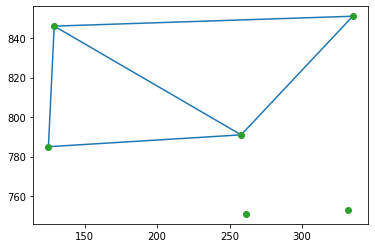

In [33]:
tri = Delaunay(rotated_points[:, 0:2]) # discarding third column for 2d triangulation
D_tri_to_faces = np.array(tri.simplices)


# Create the mesh
cube = mesh.Mesh(np.zeros(D_tri_to_faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(D_tri_to_faces):
    for j in range(3):
        cube.vectors[i][j] = copy_[f[j],:]
        #print(i, j)

# Write the mesh to file "face_1.stl"
cube.save('face_1.stl')

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], D_tri_to_faces)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [47]:
# numpy array slicing practicing
z = np.zeros((4,3))
z[:,0:2]=100
print(z[:,0:2])


[[100. 100.]
 [100. 100.]
 [100. 100.]
 [100. 100.]]
